# Used Cars’ Price Prediction
### Omar Hesham | Enas Ahmed
### Dr. Ghada Hamed

# Used Libraries

In [335]:
import pandas as pd
import numpy as np
import missingno as msg
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

# Global Variables

In [336]:
DATASET_FILE = './dataset.csv'

# Dataset
________________________________

## Load Dataset

In [337]:
dataset = pd.read_csv(DATASET_FILE)
dataset.head()

,model,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,130000


In [338]:
dataset.dtypes

model             object
year               int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats            float64
selling_price      int64
dtype: object

## Car Model

In [339]:
dataset.model

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: model, Length: 8128, dtype: object

In [340]:
unique_model = dataset.model.unique()
print("Num. of Unique Values: " + str(len(unique_model)) + "\n")
print(unique_model)

Num. of Unique Values: 2058

['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']


## Year of Bought

In [341]:
dataset.year

0       2014
1       2014
2       2006
3       2010
4       2007
        ... 
8123    2013
8124    2007
8125    2009
8126    2013
8127    2013
Name: year, Length: 8128, dtype: int64

In [342]:
unique_year = dataset.year.unique()
print("Num. of Unique Values: " + str(len(unique_year)) + "\n")
print(unique_year)

Num. of Unique Values: 29

[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]


## Kms Driven

In [343]:
dataset.km_driven

0       145500
1       120000
2       140000
3       127000
4       120000
         ...  
8123    110000
8124    119000
8125    120000
8126     25000
8127     25000
Name: km_driven, Length: 8128, dtype: int64

In [344]:
unique_km_driven = dataset.km_driven.unique()
print("Num. of Unique Values: " + str(len(unique_km_driven)) + "\n")
print(unique_km_driven)

Num. of Unique Values: 921

[ 145500  120000  140000  127000   45000  175000    5000   90000  169000
   68000  100000   80000   40000   70000   53000   50000   72000   35000
   28000   25000    2388   16200   10000   15000   42000   60000   76000
   28900   86300   23300   32600   10300   77000   99000   27800   49800
  151000   54700   64000   63000  127700   33900   59000  110000  147000
   30000  135000    9850   78000  170000   49000   32000   38000   44000
   12000   55500   61500  150000   37800  114000   48000   69000   13000
   76139   65000    1303   31800   20000   17000   21000   37000   29500
   27000    7500   19000   41000   39000   22000   47000   72200   49900
    9000   11000   95000   18000   46100   16000    9654   24300   42163
    8000   71000    9500   36600   14000  120600   86000    7800   31377
   75000   93000  125000   13500  162500   92500  158000    2000  181000
  193000  122358   95200   33033   63063  207890    7976   16500   99361
   33000   80100  16000

## Fuel Type

In [345]:
dataset.fuel

0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
8123    Petrol
8124    Diesel
8125    Diesel
8126    Diesel
8127    Diesel
Name: fuel, Length: 8128, dtype: object

In [346]:
unique_fuel = dataset.fuel .unique()
print("Num. of Unique Values: " + str(len(unique_fuel)) + "\n")
print(unique_fuel)

Num. of Unique Values: 4

['Diesel' 'Petrol' 'LPG' 'CNG']


## Seller Type

In [347]:
dataset.seller_type

0       Individual
1       Individual
2       Individual
3       Individual
4       Individual
           ...    
8123    Individual
8124    Individual
8125    Individual
8126    Individual
8127    Individual
Name: seller_type, Length: 8128, dtype: object

In [348]:
unique_seller_type = dataset.seller_type.unique()
print("Num. of Unique Values: " + str(len(unique_seller_type)) + "\n")
print(unique_seller_type)

Num. of Unique Values: 3

['Individual' 'Dealer' 'Trustmark Dealer']


## Transmission

In [349]:
dataset.transmission

0       Manual
1       Manual
2       Manual
3       Manual
4       Manual
         ...  
8123    Manual
8124    Manual
8125    Manual
8126    Manual
8127    Manual
Name: transmission, Length: 8128, dtype: object

In [350]:
unique_transmission = dataset.transmission.unique()
print("Num. of Unique Values: " + str(len(unique_transmission)) + "\n")
print(unique_transmission)

Num. of Unique Values: 2

['Manual' 'Automatic']


## Owner

In [351]:
dataset.owner

0                First Owner
1               Second Owner
2                Third Owner
3                First Owner
4                First Owner
                ...         
8123             First Owner
8124    Fourth & Above Owner
8125             First Owner
8126             First Owner
8127             First Owner
Name: owner, Length: 8128, dtype: object

In [352]:
unique_owner = dataset.owner.unique()
print("Num. of Unique Values: " + str(len(unique_owner)) + "\n")
print(unique_owner)

Num. of Unique Values: 5

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


## Mileage

In [353]:
dataset.mileage

0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
8123     18.5 kmpl
8124     16.8 kmpl
8125     19.3 kmpl
8126    23.57 kmpl
8127    23.57 kmpl
Name: mileage, Length: 8128, dtype: object

In [354]:
unique_mileage = dataset.mileage.unique()
print("Num. of Unique Values: " + str(len(unique_mileage)) + "\n")
print(unique_mileage)

Num. of Unique Values: 394

['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl'
 '17.3 km/kg' '23.59 kmpl' '20.0 kmpl' '19.01 kmpl' '17.3 kmpl'
 '19.3 kmpl' nan '18.9 kmpl' '18.15 kmpl' '24.52 kmpl' '19.7 kmpl'
 '22.54 kmpl' '21.0 kmpl' '25.5 kmpl' '26.59 kmpl' '21.5 kmpl' '20.3 kmpl'
 '21.4 kmpl' '24.7 kmpl' '18.2 kmpl' '16.8 kmpl' '24.3 kmpl' '14.0 kmpl'
 '18.6 kmpl' '33.44 km/kg' '23.95 kmpl' '17.0 kmpl' '20.63 kmpl'
 '13.93 kmpl' '16.0 kmpl' '17.8 kmpl' '18.5 kmpl' '12.55 kmpl'
 '12.99 kmpl' '14.8 kmpl' '13.5 kmpl' '26.0 kmpl' '20.65 kmpl' '27.3 kmpl'
 '11.36 kmpl' '17.68 kmpl' '14.28 kmpl' '18.53 kmpl' '14.84 kmpl'
 '21.12 kmpl' '20.36 kmpl' '21.27 kmpl' '18.16 kmpl' '22.0 kmpl'
 '25.1 kmpl' '20.51 kmpl' '21.66 kmpl' '25.2 kmpl' '22.9 kmpl'
 '16.02 kmpl' '20.54 kmpl' '22.77 kmpl' '15.71 kmpl' '23.1 kmpl'
 '19.02 kmpl' '19.81 kmpl' '26.2 km/kg' '16.47 kmpl' '15.04 kmpl'
 '19.1 kmpl' '21.79 kmpl' '18.8 kmpl' '21.21 kmpl' '15.37 kmpl'
 '11.79 kmpl' '19.0 kmpl' 

## Engine Capacity

In [355]:
dataset.engine

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8128, dtype: object

In [356]:
unique_engine = dataset.engine.unique()
print("Num. of Unique Values: " + str(len(unique_engine)) + "\n")
print(unique_engine)

Num. of Unique Values: 122

['1248 CC' '1498 CC' '1497 CC' '1396 CC' '1298 CC' '1197 CC' '1061 CC'
 '796 CC' '1364 CC' '1399 CC' '1461 CC' '993 CC' nan '1198 CC' '1199 CC'
 '998 CC' '1591 CC' '2179 CC' '1368 CC' '2982 CC' '2494 CC' '2143 CC'
 '2477 CC' '1462 CC' '2755 CC' '1968 CC' '1798 CC' '1196 CC' '1373 CC'
 '1598 CC' '1998 CC' '1086 CC' '1194 CC' '1172 CC' '1405 CC' '1582 CC'
 '999 CC' '2487 CC' '1999 CC' '3604 CC' '2987 CC' '1995 CC' '1451 CC'
 '1969 CC' '2967 CC' '2497 CC' '1797 CC' '1991 CC' '2362 CC' '1493 CC'
 '1599 CC' '1341 CC' '1794 CC' '799 CC' '1193 CC' '2696 CC' '1495 CC'
 '1186 CC' '1047 CC' '2498 CC' '2956 CC' '2523 CC' '1120 CC' '624 CC'
 '1496 CC' '1984 CC' '2354 CC' '814 CC' '793 CC' '1799 CC' '936 CC'
 '1956 CC' '1997 CC' '1499 CC' '1948 CC' '2997 CC' '2489 CC' '2499 CC'
 '2609 CC' '2953 CC' '1150 CC' '1994 CC' '1388 CC' '1527 CC' '2199 CC'
 '995 CC' '2993 CC' '1586 CC' '1390 CC' '909 CC' '2393 CC' '3198 CC'
 '1339 CC' '2835 CC' '2092 CC' '1595 CC' '2496 CC' '1596

## Engine Max Power

In [357]:
dataset.max_power

0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8128, dtype: object

In [358]:
unique_max_power = dataset.max_power.unique()
print("Num. of Unique Values: " + str(len(unique_max_power)) + "\n")
print(unique_max_power)

Num. of Unique Values: 323

['74 bhp' '103.52 bhp' '78 bhp' '90 bhp' '88.2 bhp' '81.86 bhp' '57.5 bhp'
 '37 bhp' '67.1 bhp' '68.1 bhp' '108.45 bhp' '60 bhp' '73.9 bhp' nan
 '67 bhp' '82 bhp' '88.5 bhp' '46.3 bhp' '88.73 bhp' '64.1 bhp' '98.6 bhp'
 '88.8 bhp' '83.81 bhp' '83.1 bhp' '47.3 bhp' '73.8 bhp' '34.2 bhp'
 '35 bhp' '81.83 bhp' '40.3 bhp' '121.3 bhp' '138.03 bhp' '160.77 bhp'
 '117.3 bhp' '116.3 bhp' '83.14 bhp' '67.05 bhp' '168.5 bhp' '100 bhp'
 '120.7 bhp' '98.63 bhp' '175.56 bhp' '103.25 bhp' '171.5 bhp' '100.6 bhp'
 '174.33 bhp' '187.74 bhp' '170 bhp' '78.9 bhp' '88.76 bhp' '86.8 bhp'
 '108.495 bhp' '108.62 bhp' '93.7 bhp' '103.6 bhp' '98.59 bhp' '189 bhp'
 '67.04 bhp' '68.05 bhp' '58.2 bhp' '82.85 bhp' '81.80 bhp' '73 bhp'
 '120 bhp' '94.68 bhp' '160 bhp' '65 bhp' '155 bhp' '69.01 bhp'
 '126.32 bhp' '138.1 bhp' '83.8 bhp' '126.2 bhp' '98.96 bhp' '62.1 bhp'
 '86.7 bhp' '188 bhp' '214.56 bhp' '177 bhp' '280 bhp' '148.31 bhp'
 '254.79 bhp' '190 bhp' '177.46 bhp' '204 bhp' '141

## Seats Number

In [359]:
dataset.seats

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
8123    5.0
8124    5.0
8125    5.0
8126    5.0
8127    5.0
Name: seats, Length: 8128, dtype: float64

In [360]:
unique_seats = dataset.seats.unique()
print("Num. of Unique Values: " + str(len(unique_seats)) + "\n")
print(unique_seats)

Num. of Unique Values: 10

[ 5.  4. nan  7.  8.  6.  9. 10. 14.  2.]


## Selling Price

In [361]:
dataset.selling_price

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

In [362]:
unique_selling_price= dataset.selling_price.unique()
print("Num. of Unique Values: " + str(len(unique_selling_price)) + "\n")
print(unique_selling_price)

Num. of Unique Values: 677

[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000    70000   730000   650000   330000
   366000  1149000   425000  2100000   925000   675000   819999   390000
  1500000   700000  1450000  1090000   850000  1650000  1750000  1590000
  1689999  1425000   265000   190000   630000   540000   448000   745000
  1025000   235000  1700000    50000  1200000   610000  2500000   484999
   315000   475000   290000   455000   351000   535000   175000   565000
   120000   725000   185000   615000   270000   625000   866000   375000
   522000   451999   780000   595000  1140000   360000   105000   135000
   690000  3975000  5150000  3200000  4100000  4500000  6000000  3790000
  2150000  5800000  1864999  2700000   795000  3400000  2650000  5850000
   975000   805000  262

# Data Preparation
____________________________

## Generate Sub-columns

In [363]:
# Spliting Car Model into 3 sub-columns COMPANY, MODEL, VERSION
company = []
model = []
version = []

for record in dataset.model.iloc[:].values:
    company.append(record.split()[0])
    model.append(record.split()[1])
    version.append(' '.join(record.split()[2:]))
    
# Drop the old model column
dataset = dataset.drop(columns=['model'], axis=1)

# Insert the new three sub-columns
dataset.insert(0, "company", company, allow_duplicates = True)
dataset.insert(1, "model", model, allow_duplicates = True)
dataset.insert(2, "version", version, allow_duplicates = True)

dataset.head()

,company,model,version,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti,Swift,Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,450000
1,Skoda,Rapid,1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,370000
2,Honda,City,2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,158000
3,Hyundai,i20,Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,225000
4,Maruti,Swift,VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,130000


## Standardization

In [364]:
records_in_kmkg = 0
records_in_kmpl = 0

for record in dataset.mileage:
    if str(record).endswith("kmpl"):
        records_in_kmpl += 1
    elif str(record).endswith("km/kg"):
        records_in_kmkg += 1
        
print(f'The number of rows measured by kmpl : {records_in_kmpl}')
print(f'The number of rows measured by km/kg : {records_in_kmkg}')

The number of rows measured by kmpl : 7819
The number of rows measured by km/kg : 88


In [365]:
mileage = dataset.mileage.values[:]

for i in range(len(mileage)):
    if 'kmpl' in str(mileage[i]):
        mileage[i] = float(mileage[i].replace('kmpl', ''))
    elif 'km/kg' in str(mileage[i]):
        mileage[i] = float(mileage[i].replace('km/kg', '')) * 1.3468
    
dataset['mileage'] = pd.to_numeric(mileage)
dataset.head()

,company,model,version,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti,Swift,Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,5.0,450000
1,Skoda,Rapid,1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,5.0,370000
2,Honda,City,2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,5.0,158000
3,Hyundai,i20,Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,5.0,225000
4,Maruti,Swift,VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,5.0,130000


## Handling NULLs

<AxesSubplot:>

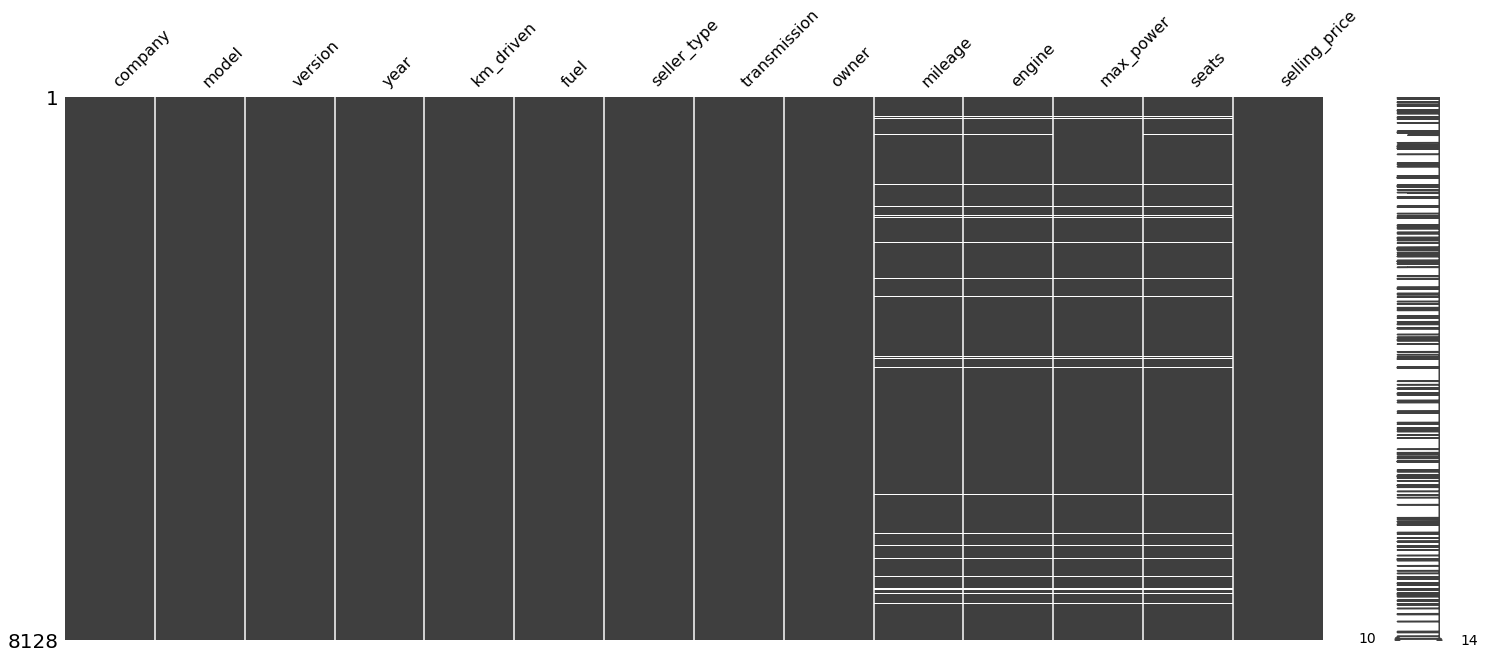

In [366]:
msg.matrix(dataset)

In [367]:
dataset.isnull().sum()

company            0
model              0
version            0
year               0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
selling_price      0
dtype: int64

In [368]:
def calcNullsPercentage(column):
  return str(format((column.isnull().sum() / len(column)) * 100, '.2f')) +'%'

print('NULLs percentage in: \n')
print('mileage -> ' + calcNullsPercentage(dataset.mileage))
print('engine -> ' + calcNullsPercentage(dataset.engine))
print('max power -> ' + calcNullsPercentage(dataset.max_power))
print('seats -> ' + calcNullsPercentage(dataset.seats))

NULLs percentage in: 

mileage -> 2.72%
engine -> 2.72%
max power -> 2.65%
seats -> 2.72%


In [369]:
dataset.dropna(axis=0, subset=['mileage'], how= 'any',inplace=True )
dataset.dropna(axis=0, subset=['engine'], how= 'any',inplace=True )
dataset.dropna(axis=0, subset=['max_power'], how= 'any',inplace=True )
dataset.dropna(axis=0, subset=['seats'], how= 'any',inplace=True )

print(dataset.isnull().sum())
print('Cases in Dataset: ' + str(len(dataset)))

company          0
model            0
version          0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
selling_price    0
dtype: int64
Cases in Dataset: 7907


<AxesSubplot:>

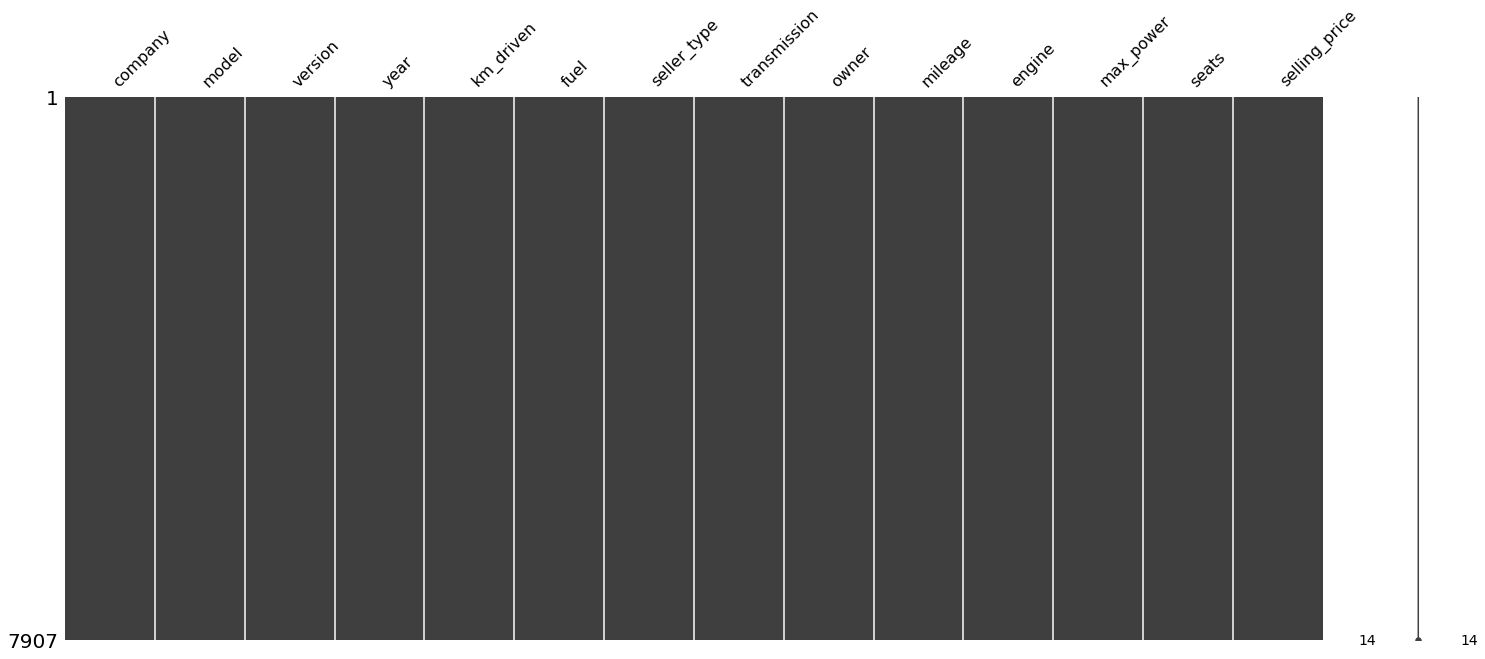

In [370]:
msg.matrix(dataset)

## Cleaning Data

In [371]:
def cleanColumn(column, unit, column_header):
  values = column.values
  for i in range(len(values)):
    values[i] = str(values[i]).replace(unit, '')

  dataset[column_header] = pd.to_numeric(values)

cleanColumn(dataset.engine, 'CC', 'engine')

# print(dataset[(dataset == ' ').any(axis=1)])
dataset.drop(labels=4933, axis=0, inplace=True)
cleanColumn(dataset.max_power, 'bhp', 'max_power')

dataset.head()

,company,model,version,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti,Swift,Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,450000
1,Skoda,Rapid,1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,370000
2,Honda,City,2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,158000
3,Hyundai,i20,Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,225000
4,Maruti,Swift,VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,130000


## Mapping String Values 

In [372]:
# Return a map of values from 0 ... n
def mapping_values(column):
    unique = column.unique()
    valuesMap = {}
    
    for i in range(len(unique)):
        valuesMap[unique[i]] = i
     
    print(len(valuesMap))
    if len(valuesMap) < 100:
      print(valuesMap)
      print()
    
    return valuesMap

In [373]:
mapping_values(dataset.version)

# Drop Version as it contains many unique values
dataset = dataset.drop(columns=['version'], axis=1)

1855


In [374]:
company_map = {}
model_map = {}
fuel_map = {}
seller_map = {}
transmission_map = {} 
owner_map = {}

In [375]:
# Done all the mapping process
def perform_mapping():
  global company_map, model_map, fuel_map, seller_map, transmission_map, owner_map
  company_map = mapping_values(dataset.company)
  model_map = mapping_values(dataset.model)
  fuel_map = mapping_values(dataset.fuel)
  seller_map = mapping_values(dataset.seller_type)
  transmission_map = mapping_values(dataset.transmission)
  owner_map = mapping_values(dataset.owner)

  dataset.company.replace(company_map, inplace=True)
  dataset.model.replace(model_map, inplace=True)
  dataset.fuel.replace(fuel_map, inplace=True)
  dataset.seller_type.replace(seller_map, inplace=True)
  dataset.transmission.replace(transmission_map, inplace=True)
  dataset.owner.replace(owner_map, inplace=True)

# perform_mapping()
dataset.head()

,company,model,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti,Swift,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,450000
1,Skoda,Rapid,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,370000
2,Honda,City,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,158000
3,Hyundai,i20,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,225000
4,Maruti,Swift,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,130000


# Summarizing Data

## Categorical Variables

In [376]:
def categorical_frequency_table(column_header):
  frequency = pd.crosstab(index=dataset[column_header], columns='Frequency')
  percentage = ((frequency / frequency.sum()) * 100)
  frequency.insert(1, "Percentage", percentage, allow_duplicates = True)
  frequency.insert(2, "Cumulative Percentage", percentage.cumsum(), allow_duplicates = True)
  return frequency

In [377]:
categorical_frequency_table('company')

col_0,Frequency,Percentage,Cumulative Percentage
company,,,
Ambassador,4,0.050594,0.050594
Ashok,1,0.012649,0.063243
Audi,40,0.505945,0.569188
BMW,118,1.492537,2.061725
Chevrolet,230,2.909183,4.970908
Daewoo,3,0.037946,5.008854
Datsun,65,0.822160,5.831014
Fiat,41,0.518593,6.349608
Force,6,0.075892,6.425500


In [378]:
categorical_frequency_table('fuel')

col_0,Frequency,Percentage,Cumulative Percentage
fuel,,,
CNG,52,0.657728,0.657728
Diesel,4299,54.376423,55.034151
LPG,35,0.442702,55.476853
Petrol,3520,44.523147,100.000000


In [379]:
categorical_frequency_table('seller_type')

col_0,Frequency,Percentage,Cumulative Percentage
seller_type,,,
Dealer,1107,14.002024,14.002024
Individual,6563,83.012902,97.014925
Trustmark Dealer,236,2.985075,100.000000


In [380]:
categorical_frequency_table('transmission')

col_0,Frequency,Percentage,Cumulative Percentage
transmission,,,
Automatic,1041,13.167215,13.167215
Manual,6865,86.832785,100.000000


In [381]:
categorical_frequency_table('owner')

col_0,Frequency,Percentage,Cumulative Percentage
owner,,,
First Owner,5215,65.962560,65.962560
Fourth & Above Owner,160,2.023779,67.986339
Second Owner,2016,25.499621,93.485960
Test Drive Car,5,0.063243,93.549203
Third Owner,510,6.450797,100.000000


# Descriptive Statistical

## Centeral Tendency

### Mean


In [382]:
dataset.mean()

year               2013.983936
km_driven         69188.659752
mileage              19.504086
engine             1458.708829
max_power            91.587374
seats                 5.416393
selling_price    649813.720845
dtype: float64

### Median

In [383]:
dataset.median()

year               2015.00
km_driven         60000.00
mileage              19.33
engine             1248.00
max_power            82.00
seats                 5.00
selling_price    450000.00
dtype: float64

### Mode

In [384]:
dataset.mode()

,company,model,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti,Swift,2017,120000,Diesel,Individual,Manual,First Owner,18.9,1248,74.0,5.0,300000


# Measures of Dispersion

## Range

In [385]:
pd.DataFrame({
    'year' : [np.ptp(dataset.year)],
    'km_driven' : [np.ptp(dataset.km_driven)],
    'mileage' : [np.ptp(dataset.engine)],
    'engine' : [np.ptp(dataset.max_power)],
    'max_power' : [np.ptp(dataset.seats)],
    'selling_price' : [np.ptp(dataset.selling_price)]
})

,year,km_driven,mileage,engine,max_power,selling_price
0,26,2360456,2980,367.2,12.0,9970001


## InterQuartile Range

In [386]:
# np.percentile(, 25) --> Q1
# np.percentile(, 50) --> Q2
# np.percentile(, 75) --> Q3
def calc_IQR(column):
    return np.percentile(column, 75) - np.percentile(column, 25)

pd.DataFrame({
    'year' : [calc_IQR(dataset.year)],
    'km_driven' : [calc_IQR(dataset.km_driven)],
    'mileage' : [calc_IQR(dataset.mileage)],
    'engine' : [calc_IQR(dataset.engine)],
    'max_power' : [calc_IQR(dataset.max_power)],
    'selling_price' : [calc_IQR(dataset.selling_price)]
})

,year,km_driven,mileage,engine,max_power,selling_price
0,5.0,60425.0,5.54,385.0,33.95,420000.0


## Variance

In [387]:
pd.DataFrame({
    'year' : [format(dataset.year.var(), '.5f')],
    'km_driven' : [format(dataset.km_driven.var(), '.5f')],
    'mileage' : [format(dataset.mileage.var(), '.5f')],
    'engine' : [format(dataset.engine.var(), '.5f')],
    'max_power' : [format(dataset.max_power.var(), '.5f')],
    'selling_price' : [format(dataset.selling_price.var(), '.5f')]
})

,year,km_driven,mileage,engine,max_power,selling_price
0,14.92814,3225364923.94723,17.68095,253908.21274,1277.86346,661916888419.46741


## Standard Deviation

In [388]:
dataset.std()

year                  3.863695
km_driven         56792.296343
mileage               4.204873
engine              503.893057
max_power            35.747216
seats                 0.959208
selling_price    813582.748354
dtype: float64

# Visualising Data

## Pie Chart

In [389]:
def pieChart(column, column_header):
    freq = pd.crosstab(index=dataset[column_header], columns='freq').values
    freq = freq.reshape(len(freq))

    label = column.unique()
    label.sort()

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.pie(freq, labels=label, autopct='%1.1f%%')
    plt.show()

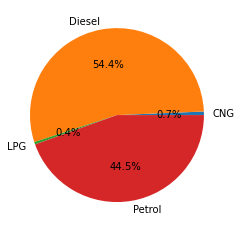

In [390]:
pieChart(dataset.fuel, 'fuel')

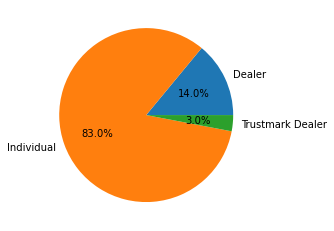

In [391]:
pieChart(dataset.seller_type, 'seller_type')

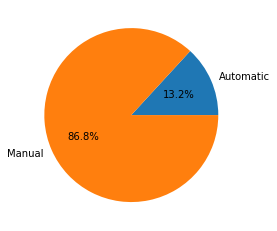

In [392]:
pieChart(dataset.transmission, 'transmission')

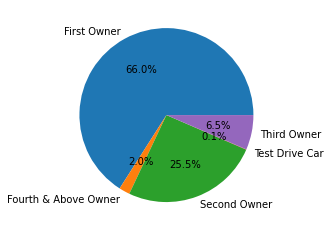

In [393]:
pieChart(dataset.owner, 'owner')

## Bar Graph

In [394]:
def barGraph(column, column_header):
    label = column.unique()
    label.sort()

    freq = pd.crosstab(index=dataset[column_header], columns='freq').values
    freq = freq.reshape(len(freq))

    fig, ax = plt.subplots(figsize=(30, 10))
    ax.bar(label, freq)
    ax.set_xlabel(column_header)
    ax.set_ylabel('Frequency')
    plt.show()

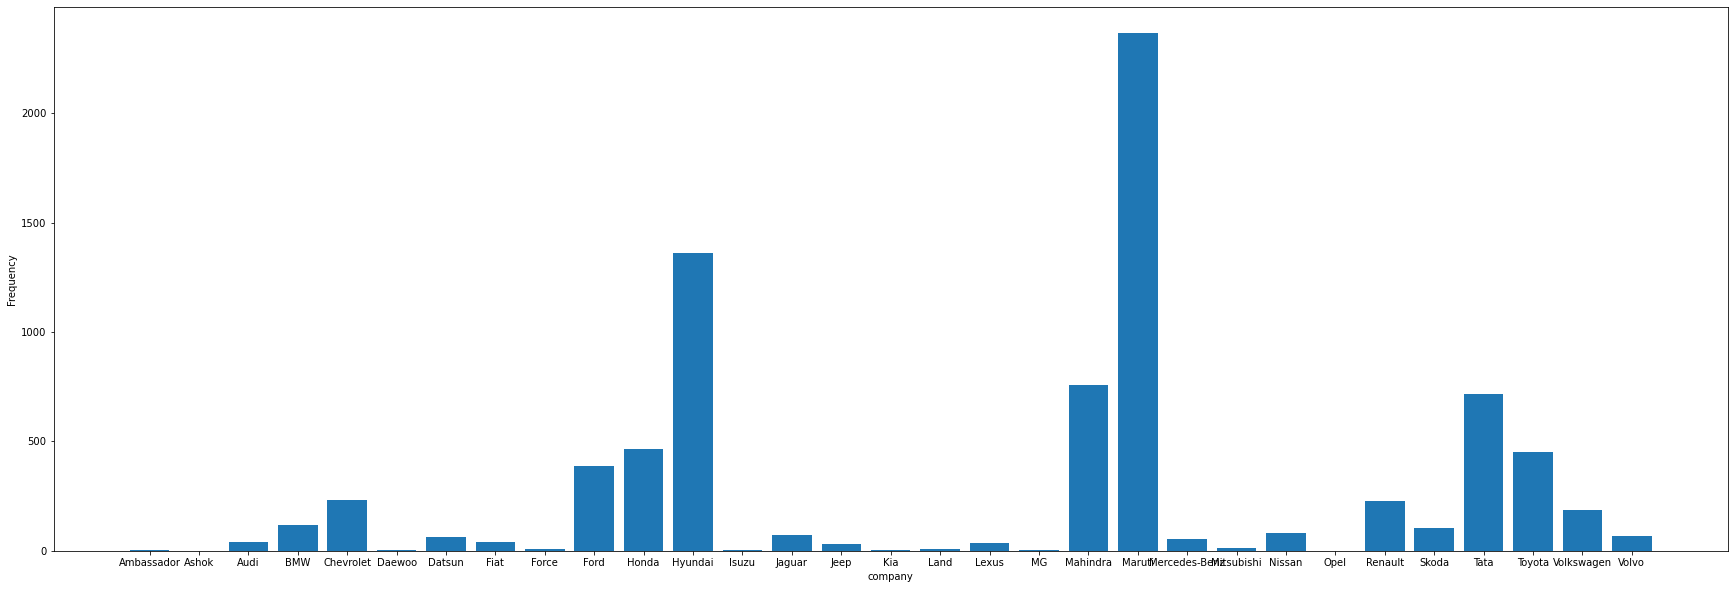

In [395]:
barGraph(dataset.company, 'company')

## Box Plot

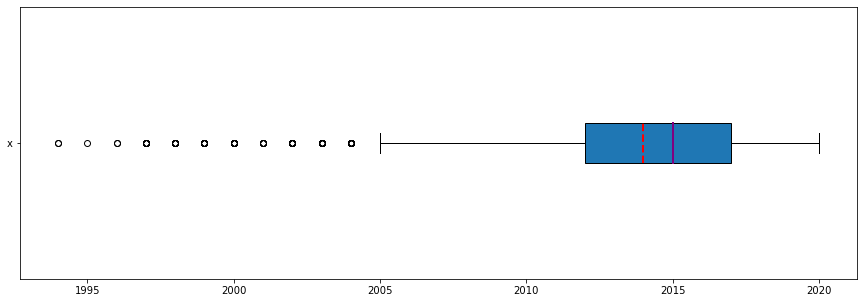

In [396]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(dataset.year.values, vert=False, showmeans=True, meanline=True,
    labels='x', patch_artist=True,
    medianprops={'linewidth': 2, 'color': 'purple'},
    meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

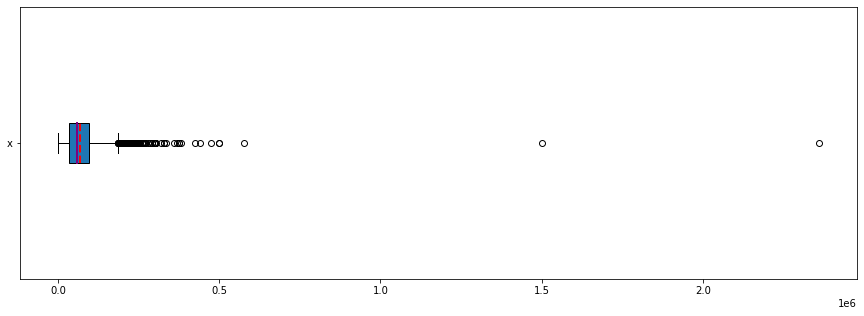

In [397]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(dataset.km_driven.values, vert=False, showmeans=True, meanline=True,
    labels='x', patch_artist=True,
    medianprops={'linewidth': 2, 'color': 'purple'},
    meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

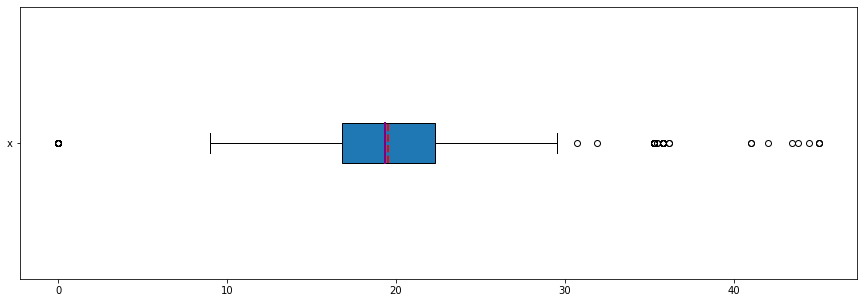

In [398]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(dataset.mileage.values, vert=False, showmeans=True, meanline=True,
    labels='x', patch_artist=True,
    medianprops={'linewidth': 2, 'color': 'purple'},
    meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

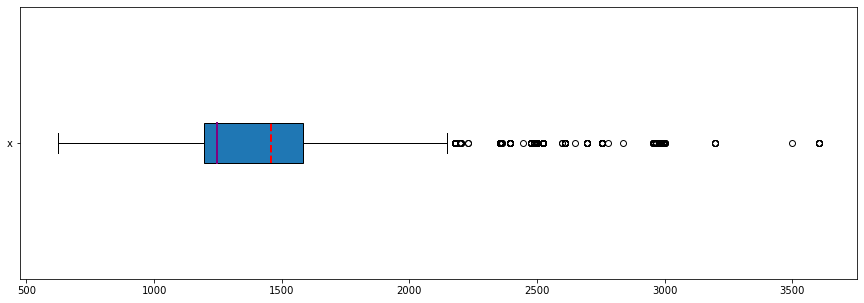

In [399]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(dataset.engine.values, vert=False, showmeans=True, meanline=True,
    labels='x', patch_artist=True,
    medianprops={'linewidth': 2, 'color': 'purple'},
    meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

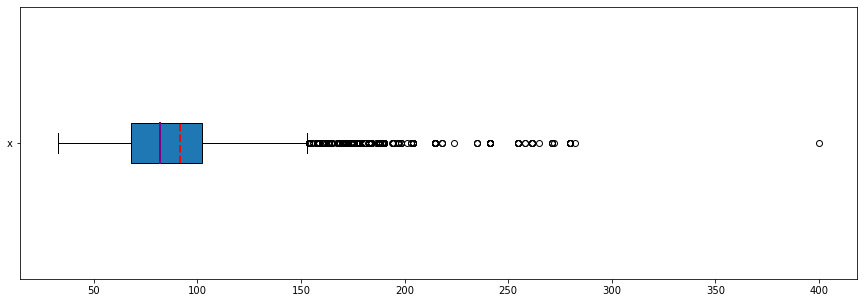

In [400]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(dataset.max_power.values, vert=False, showmeans=True, meanline=True,
    labels='x', patch_artist=True,
    medianprops={'linewidth': 2, 'color': 'purple'},
    meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

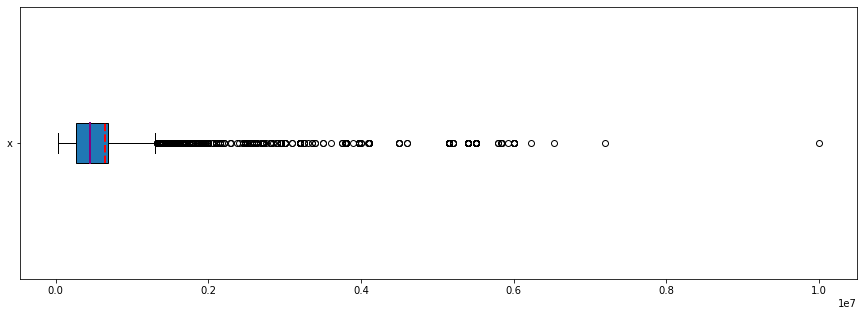

In [401]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.boxplot(dataset.selling_price.values, vert=False, showmeans=True, meanline=True,
    labels='x', patch_artist=True,
    medianprops={'linewidth': 2, 'color': 'purple'},
    meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

## Histograms

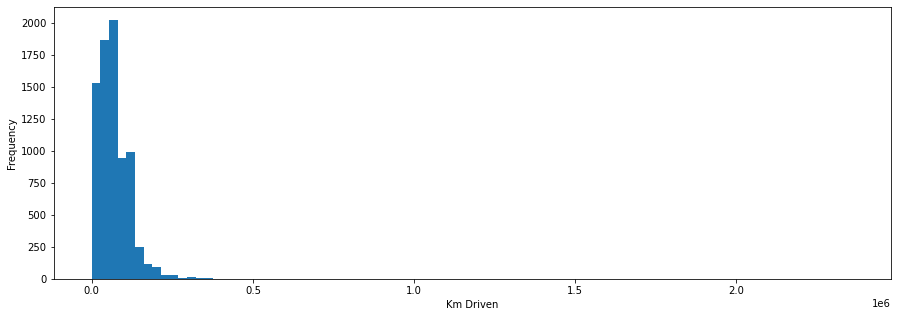

In [402]:
hist, bin_edges = np.histogram(dataset.km_driven.values, bins=int(np.sqrt(len(dataset.km_driven))))

fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(dataset.km_driven.values, bin_edges, cumulative=False)
ax.set_xlabel('Km Driven')
ax.set_ylabel('Frequency')
plt.show()

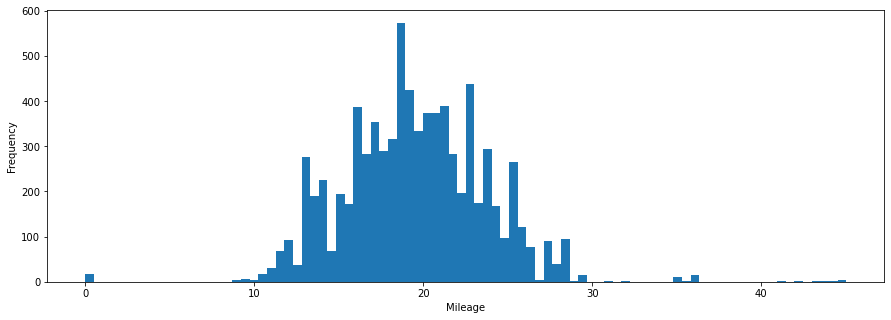

In [403]:
hist, bin_edges = np.histogram(dataset.mileage.values, bins=int(np.sqrt(len(dataset.mileage))))

fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(dataset.mileage.values, bin_edges, cumulative=False)
ax.set_xlabel('Mileage')
ax.set_ylabel('Frequency')
plt.show()

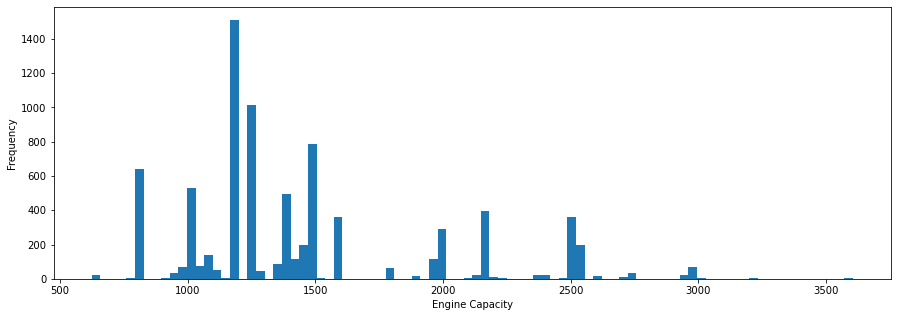

In [404]:
hist, bin_edges = np.histogram(dataset.engine.values, bins=int(np.sqrt(len(dataset.engine))))

fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(dataset.engine.values, bin_edges, cumulative=False)
ax.set_xlabel('Engine Capacity')
ax.set_ylabel('Frequency')
plt.show()

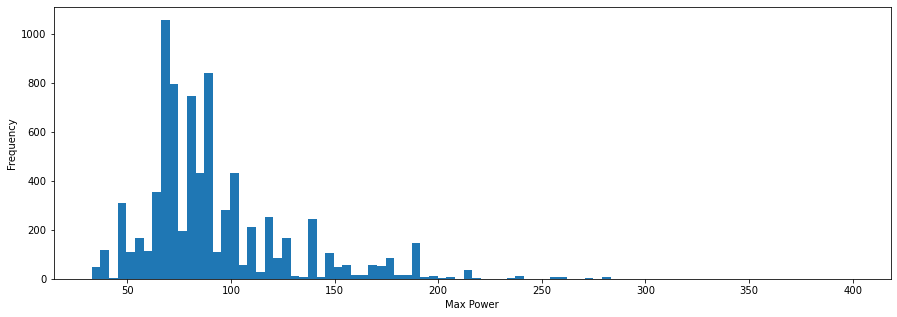

In [405]:
hist, bin_edges = np.histogram(dataset.max_power.values, bins=int(np.sqrt(len(dataset.max_power))))

fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(dataset.max_power.values, bin_edges, cumulative=False)
ax.set_xlabel('Max Power')
ax.set_ylabel('Frequency')
plt.show()

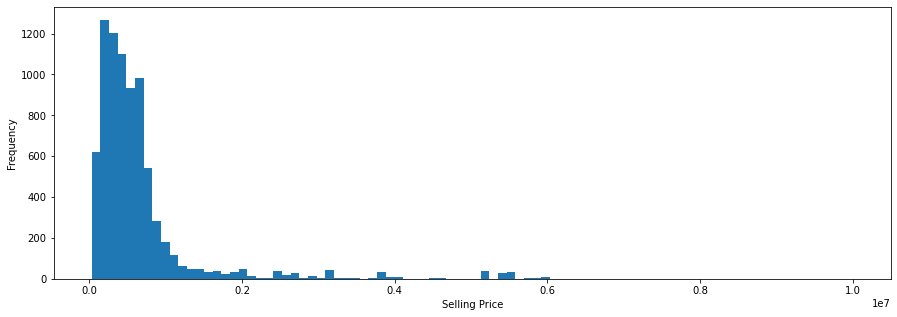

In [406]:
hist, bin_edges = np.histogram(dataset.selling_price.values, bins=int(np.sqrt(len(dataset.selling_price))))

fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(dataset.selling_price.values, bin_edges, cumulative=False)
ax.set_xlabel('Selling Price')
ax.set_ylabel('Frequency')
plt.show()

# Measures of Correlation 

In [407]:
# Year , Selling Price
dataset.year.corr(dataset.selling_price)

0.4123015581711659

In [408]:
# km driven , Selling Price
dataset.km_driven.corr(dataset.selling_price)

-0.22215847533483776

In [409]:
# Mileage , Selling Price
dataset.mileage.corr(dataset.selling_price)

-0.1301727835191734

In [410]:
# Engine , Selling Price
dataset.engine.corr(dataset.selling_price)

0.4556818000356144

In [411]:
# Max power , Selling Price
dataset.max_power.corr(dataset.selling_price)

0.7496737800444901

In [412]:
# seats , Selling Price
dataset.seats.corr(dataset.selling_price)

0.04161669383026344

In [413]:
# Drop the seats column
dataset = dataset.drop(columns=['seats'], axis=1)
dataset.head()

,company,model,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,Maruti,Swift,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,450000
1,Skoda,Rapid,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,370000
2,Honda,City,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,158000
3,Hyundai,i20,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,225000
4,Maruti,Swift,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,130000



# Linear Regression

In [414]:
def predictByYear(x, column):
    b1 = dataset.year.corr(dataset.selling_price) * (dataset.year.std() / dataset.year.std())
    b0 = dataset.selling_price.mean() - b1 * dataset.year.mean()
    return b0 + b1 * x


# Population Mean

In [415]:
dataset.mean()

year               2013.983936
km_driven         69188.659752
mileage              19.504086
engine             1458.708829
max_power            91.587374
selling_price    649813.720845
dtype: float64

# Population Variance

In [416]:
pd.DataFrame({
    'year' : [format(dataset.year.var(ddof=0), '.5f')],
    'km_driven' : [format(dataset.km_driven.var(ddof=0), '.5f')],
    'mileage' : [format(dataset.mileage.var(ddof=0), '.5f')],
    'engine' : [format(dataset.engine.var(ddof=0), '.5f')],
    'max_power' : [format(dataset.max_power.var(ddof=0), '.5f')],
    'selling_price' : [format(dataset.selling_price.var(ddof=0), '.5f')]
})

,year,km_driven,mileage,engine,max_power,selling_price
0,14.92625,3224956959.75244,17.67872,253876.09685,1277.70183,661833165058.92871


# Population Standard Deviatoin

In [417]:
dataset.std(ddof=0)
dataset.head()

,company,model,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,Maruti,Swift,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,450000
1,Skoda,Rapid,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,370000
2,Honda,City,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,158000
3,Hyundai,i20,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,225000
4,Maruti,Swift,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,130000


# Linear Regression

In [418]:
dataset

,company,model,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,Maruti,Swift,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,450000
1,Skoda,Rapid,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,370000
2,Honda,City,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,158000
3,Hyundai,i20,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,225000
4,Maruti,Swift,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,i20,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,320000
8124,Hyundai,Verna,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,135000
8125,Maruti,Swift,2009,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,382000
8126,Tata,Indigo,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,290000


In [419]:
perform_mapping()
dataset

31
{'Maruti': 0, 'Skoda': 1, 'Honda': 2, 'Hyundai': 3, 'Toyota': 4, 'Ford': 5, 'Renault': 6, 'Mahindra': 7, 'Tata': 8, 'Chevrolet': 9, 'Datsun': 10, 'Jeep': 11, 'Mercedes-Benz': 12, 'Mitsubishi': 13, 'Audi': 14, 'Volkswagen': 15, 'BMW': 16, 'Nissan': 17, 'Lexus': 18, 'Jaguar': 19, 'Land': 20, 'MG': 21, 'Volvo': 22, 'Daewoo': 23, 'Kia': 24, 'Fiat': 25, 'Force': 26, 'Ambassador': 27, 'Ashok': 28, 'Isuzu': 29, 'Opel': 30}

197
4
{'Diesel': 0, 'Petrol': 1, 'LPG': 2, 'CNG': 3}

3
{'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}

2
{'Manual': 0, 'Automatic': 1}

5
{'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}



,company,model,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,0,0,2014,145500,0,0,0,0,23.40,1248,74.00,450000
1,1,1,2014,120000,0,0,0,1,21.14,1498,103.52,370000
2,2,2,2006,140000,1,0,0,2,17.70,1497,78.00,158000
3,3,3,2010,127000,0,0,0,0,23.00,1396,90.00,225000
4,0,0,2007,120000,1,0,0,0,16.10,1298,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,3,3,2013,110000,1,0,0,0,18.50,1197,82.85,320000
8124,3,22,2007,119000,0,0,0,3,16.80,1493,110.00,135000
8125,0,0,2009,120000,0,0,0,0,19.30,1248,73.90,382000
8126,8,50,2013,25000,0,0,0,0,23.57,1396,70.00,290000


In [420]:
scaler = MinMaxScaler()
dataset.iloc[:,0:-1] = pd.DataFrame(scaler.fit_transform(dataset.iloc[:,0:-1]), columns=dataset.columns[0:-1])

In [421]:
dataset

,company,model,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,0.000000,0.000000,0.769231,0.061640,0.000000,0.0,0.0,0.00,0.519573,0.209396,0.112200,450000
1,0.033333,0.005102,0.769231,0.050837,0.000000,0.0,0.0,0.25,0.469392,0.293289,0.192593,370000
2,0.066667,0.010204,0.461538,0.059310,0.333333,0.0,0.0,0.50,0.393010,0.292953,0.123094,158000
3,0.100000,0.015306,0.615385,0.053803,0.000000,0.0,0.0,0.00,0.510691,0.259060,0.155773,225000
4,0.000000,0.000000,0.500000,0.050837,0.333333,0.0,0.0,0.00,0.357484,0.226174,0.150871,130000
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320000
8124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000
8125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382000
8126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290000


In [422]:
x_train = np.array(dataset.iloc[:int(len(dataset)*(2/3)),:-1])
y_train = np.array(dataset.iloc[:int(len(dataset)*(2/3)),-1])
y_train = y_train.reshape(y_train.shape[0], 1)

x_test = dataset.iloc[int(len(dataset)*(2/3)):,:-1]
y_test = np.array(dataset.iloc[int(len(dataset)*(2/3)):,-1])

x_train = np.append(np.ones((x_train.shape[0], 1)), x_train, axis = 1)
x_test = np.append(np.ones((x_test.shape[0], 1)), x_test, axis = 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])

(5270, 12)
(5270, 1)
(2636, 12)
(2636,)
[1.         0.         0.         0.76923077 0.06164021 0.
 0.         0.         0.         0.51957289 0.20939597 0.11220044]


In [423]:
alpha = 0.001
num_of_iterations = 1000
m = int(x_train.shape[0])

In [424]:
def Predictive_Line(X, Theta):
    Predictions = None
    Predictions = np.dot(X, Theta)
    return Predictions

In [425]:
def Calculate_Cost(X, Theta, Y, m):
    J = 0
    P = Predictive_Line(X, Theta)
    J = ((1/(2 * m)) * np.sum(np.square(P - Y), axis = 0))
    return J

In [426]:
def Gradient_Descent(X, Y, Theta, alpha, num_iters, m):
    for i in range(num_iters):
        P = Predictive_Line(X, Theta)
        Theta = Theta - (alpha / m) * (((P - Y).T).dot(X)).T
    return Theta

In [427]:
Theta = []
for i in range(0, x_train.shape[1]):
  Theta.append(0)

Theta = np.array(Theta).reshape((x_train.shape[1], 1)) # shape of theta is (n,1)

Theta = Gradient_Descent(x_train, y_train, Theta, alpha, num_of_iterations, m)

Cost = Calculate_Cost(x_train, Theta, y_train, m)

y_test = Predictive_Line(x_test, Theta)

print(Theta)

print(Cost)

print(y_test)

[[285638.52582902]
 [ 45372.00591938]
 [ 58364.25666034]
 [219698.10388065]
 [  8022.42929424]
 [ 45673.05757856]
 [ 45291.77309323]
 [ 49589.25419516]
 [ 29712.66316545]
 [122217.61516362]
 [ 82950.14776836]
 [ 47788.98237995]]
[3.65537333e+11]
[[603610.29076919]
 [601283.76860262]
 [538029.96226414]
 ...
 [            nan]
 [            nan]
 [            nan]]
